In [66]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import hvplot.pandas
import requests
import time
from scipy import stats

In [67]:
infant_mortality_csv_file = "infant mortality rate.csv"
infant_mortality_df = pd.read_csv(infant_mortality_csv_file)

In [68]:
# China, Russia, USA, Brazil, Germany, UK, Japan, Israel, Australia, South Africa
infant_mortality_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,ISL,Iceland,Year,2018,...,NaN,NaN,1.19,NaN,1.87,1.5 [1.19 – 1.87],NaN,NaN,EN,2022-01-18T06:00:00.000Z
1,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,SMR,San Marino,Year,2018,...,NaN,NaN,0.80,NaN,2.97,1.54 [0.8 – 2.97],NaN,NaN,EN,2022-01-18T06:00:00.000Z
2,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,ISL,Iceland,Year,2018,...,NaN,NaN,1.32,NaN,2.05,1.65 [1.32 – 2.05],NaN,NaN,EN,2022-01-18T06:00:00.000Z
3,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,SMR,San Marino,Year,2018,...,NaN,NaN,0.88,NaN,3.25,1.69 [0.88 – 3.25],NaN,NaN,EN,2022-01-18T06:00:00.000Z
4,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,EST,Estonia,Year,2018,...,NaN,NaN,1.51,NaN,1.93,1.71 [1.51 – 1.93],NaN,NaN,EN,2022-01-18T06:00:00.000Z


In [69]:
infant_mortality_cleanna = infant_mortality_df.dropna(axis=1)
infant_mortality_cleanna.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Language,DateModified
0,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,ISL,Iceland,Year,2018,False,Sex,Female,FMLE,1.50,1.19,1.87,1.5 [1.19 – 1.87],EN,2022-01-18T06:00:00.000Z
1,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,SMR,San Marino,Year,2018,False,Sex,Female,FMLE,1.54,0.80,2.97,1.54 [0.8 – 2.97],EN,2022-01-18T06:00:00.000Z
2,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,ISL,Iceland,Year,2018,False,Sex,Both sexes,BTSX,1.65,1.32,2.05,1.65 [1.32 – 2.05],EN,2022-01-18T06:00:00.000Z
3,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,SMR,San Marino,Year,2018,False,Sex,Both sexes,BTSX,1.69,0.88,3.25,1.69 [0.88 – 3.25],EN,2022-01-18T06:00:00.000Z
4,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,EST,Estonia,Year,2018,False,Sex,Female,FMLE,1.71,1.51,1.93,1.71 [1.51 – 1.93],EN,2022-01-18T06:00:00.000Z


In [84]:
# temp_df = city_data_df[(city_data_df["Max Temp"] >= 21) & (city_data_df["Max Temp"] <= 27) & (city_data_df["Wind Speed"] <= 10)]
# temp_df
countries = ["JPN", "USA","CHN","RUS","IND","DEU","ZAF","GBR","ISR","AUS","BRA"]
# df = reduced_df.loc[(reduced_df["Country name"].isin(countries)) &
                    #(reduced_df["Year"] > 2009) &
                    #(reduced_df["Year"] < 2019)]
infant_mortality_clean_df = infant_mortality_cleanna.loc[(infant_mortality_cleanna["SpatialDimValueCode"].isin(countries)) &
                                                          (infant_mortality_cleanna["Period"] > 2009) &
                                                          (infant_mortality_cleanna["Period"] < 2019) & 
                                                          (infant_mortality_cleanna["Dim1"] == "Both sexes")]  
                            
infant_mortality_clean_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Language,DateModified
11,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,WPR,Western Pacific,Country,JPN,Japan,Year,2018,False,Sex,Both sexes,BTSX,1.88,1.84,1.92,1.88 [1.84 – 1.92],EN,2022-01-18T06:00:00.000Z
76,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,AMR,Americas,Country,BRA,Brazil,Year,2018,False,Sex,Both sexes,BTSX,13.55,12.49,14.63,13.55 [12.49 – 14.63],EN,2022-01-18T06:00:00.000Z
253,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,AFR,Africa,Country,ZAF,South Africa,Year,2018,False,Sex,Both sexes,BTSX,26.92,25.38,28.58,26.92 [25.38 – 28.58],EN,2022-01-18T06:00:00.000Z
269,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,SEAR,South-East Asia,Country,IND,India,Year,2018,False,Sex,Both sexes,BTSX,29.76,27.41,32.15,29.76 [27.41 – 32.15],EN,2022-01-18T06:00:00.000Z
271,MDG_0000000001,Infant mortality rate (probability of dying be...,numeric,EUR,Europe,Country,ISR,Israel,Year,2018,False,Sex,Both sexes,BTSX,3.00,2.90,3.11,3 [2.9 – 3.11],EN,2022-01-18T06:00:00.000Z


In [85]:
# age_sex = titanic[["Age", "Sex"]]
inf_mor_clean = infant_mortality_clean_df[["Location","Period","Dim1","FactValueNumeric"]]
# Df.rename(columns={ }) 
inf_mor_clean = inf_mor_clean.rename(columns={
    "Location": "Country name",
    "Period": "Year",
    "Dim1": "Gender",
    "FactValueNumeric": "Infant Mortality Rate (per 1000 live births)"
    })

inf_mor_clean.head()

,Country name,Year,Gender,Infant Mortality Rate (per 1000 live births)
11,Japan,2018,Both sexes,1.88
76,Brazil,2018,Both sexes,13.55
253,South Africa,2018,Both sexes,26.92
269,India,2018,Both sexes,29.76
271,Israel,2018,Both sexes,3.00


In [86]:
#df.sort_values(by=['col1'])
inf_mor_clean = inf_mor_clean.sort_values(by=["Country name","Year"])
inf_mor_clean

,Country name,Year,Gender,Infant Mortality Rate (per 1000 live births)
4971,Australia,2010,Both sexes,3.99
4377,Australia,2011,Both sexes,3.81
3786,Australia,2012,Both sexes,3.63
3198,Australia,2013,Both sexes,3.47
2609,Australia,2014,Both sexes,3.35
...,...,...,...,...
2763,United States of America,2014,Both sexes,5.88
2186,United States of America,2015,Both sexes,5.81
1603,United States of America,2016,Both sexes,5.74
1021,United States of America,2017,Both sexes,5.67


In [87]:
#df.reset_index()
# df = df.reset_index(drop=True)
# df.reset_index(drop=True, inplace=True)
inf_mor_clean = inf_mor_clean.reset_index(drop=True)
inf_mor_clean

,Country name,Year,Gender,Infant Mortality Rate (per 1000 live births)
0,Australia,2010,Both sexes,3.99
1,Australia,2011,Both sexes,3.81
2,Australia,2012,Both sexes,3.63
3,Australia,2013,Both sexes,3.47
4,Australia,2014,Both sexes,3.35
...,...,...,...,...
94,United States of America,2014,Both sexes,5.88
95,United States of America,2015,Both sexes,5.81
96,United States of America,2016,Both sexes,5.74
97,United States of America,2017,Both sexes,5.67


In [88]:
inf_mor_clean["Country name"].unique()

array(['Australia', 'Brazil', 'China', 'Germany', 'India', 'Israel',
       'Japan', 'Russian Federation', 'South Africa',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [89]:
# df['n'].replace({'a': 'x', 'b': 'y', 'c': 'w', 'd': 'z'})
rename_df = inf_mor_clean.replace(['Russian Federation','United Kingdom of Great Britain and Northern Ireland','United States of America'],['Russia','United Kingdom','United States'])
rename_df

,Country name,Year,Gender,Infant Mortality Rate (per 1000 live births)
0,Australia,2010,Both sexes,3.99
1,Australia,2011,Both sexes,3.81
2,Australia,2012,Both sexes,3.63
3,Australia,2013,Both sexes,3.47
4,Australia,2014,Both sexes,3.35
...,...,...,...,...
94,United States,2014,Both sexes,5.88
95,United States,2015,Both sexes,5.81
96,United States,2016,Both sexes,5.74
97,United States,2017,Both sexes,5.67


In [90]:
rename_df["Country name"].unique()

array(['Australia', 'Brazil', 'China', 'Germany', 'India', 'Israel',
       'Japan', 'Russia', 'South Africa', 'United Kingdom',
       'United States'], dtype=object)

In [77]:
# infant_mortality_clean_df = infant_mortality_cleanna.loc[(infant_mortality_cleanna["Dim1"] != "Both sexes")]
#female_df = rename_df.loc[rename_df["Gender"] == "Female"]
#female_df

,Country name,Year,Gender,Infant Mortality Rate (per 1000 live births)
0,Australia,2010,Female,3.59
2,Australia,2011,Female,3.44
4,Australia,2012,Female,3.30
6,Australia,2013,Female,3.17
8,Australia,2014,Female,3.06
...,...,...,...,...
188,United States,2014,Female,5.34
190,United States,2015,Female,5.28
192,United States,2016,Female,5.21
194,United States,2017,Female,5.13


In [91]:
#male_df = rename_df.loc[rename_df["Gender"] == "Male"]
#male_df

In [92]:
# define colors
country_colors = {
    "Australia":"orange",
    "Brazil":"olivedrab",
    "China":"red",
    "Germany":"darkgoldenrod",
    "India":"gold",
    "Israel":"turquoise",
    "Japan":"hotpink",
    "Russia":"grey",
    "South Africa":"mediumpurple",
    "United Kingdom":"navy",
    "United States":"royalblue"
    };

<IPython.core.display.Javascript object>


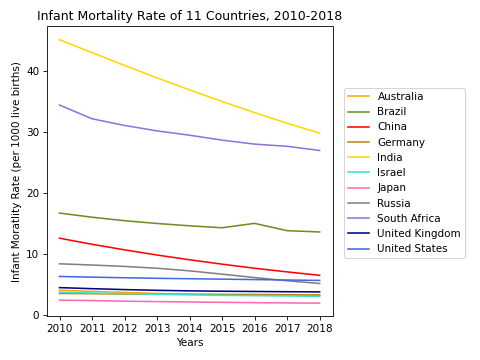

In [93]:
# line graph: x-axis: years 2010-2018, y-axis: GDP, separate color line for each country
countries_2 = [
    "Australia",
    "Brazil",
    "China",
    "Germany",
    "India",
    "Israel",
    "Japan",
    "Russia",
    "South Africa",
    "United Kingdom",
    "United States"
]

for country in countries_2:
    df_inf_mor = rename_df[rename_df["Country name"] == country]
    plt.plot(df_inf_mor["Year"], df_inf_mor["Infant Mortality Rate (per 1000 live births)"], label=country, color=country_colors[country])


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Infant Mortality Rate of 11 Countries, 2010-2018")
plt.xlabel("Years")
plt.ylabel("Infant Moratlity Rate (per 1000 live births)")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/Infant_mortality_rate.png", bbox_inches='tight')

plt.tight_layout()
# Print our chart to the screen
plt.show()